# EDA

Flight Delay Prediction Challenge.
Predict airline delays for Tunisian aviation company, Tunisair.

Hypotheses:
1) Flights departing from certain airports experience longer delays than others.
2) Morning flights have fewer delays than evening flights.
3) Certain aircraft types have higher delays due to mainteance or operational issues.
4) Delays are higher during peak travel season?


## Load packages

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load and explore data

Column definitions

DATOP - Date of flight <br>
FLTID - Flight number <br>
DEPSTN - Departure point <br>
ARRSTN - Arrival point <br>
STD - Scheduled Time departure <br>
STA - Scheduled Time arrival <br>
STATUS - Flight status <br>
AC - Aircraft Code <br>
Target - Delay in minutes <br>

In [138]:
df = pd.read_csv("data/RawData.csv")
df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [13]:
print("shape", df.shape)
print(df.info())

shape (107833, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB
None


In [139]:
# Convert columns
df["DATOP"] = pd.to_datetime(df["DATOP"])
df["STD"] = pd.to_datetime(df["STD"])
df["STA"] = pd.to_datetime(df["STA"], format='%Y-%m-%d %H.%M.%S')

# Add columns
df["FlightYear"] = df["DATOP"].dt.year
df["Departure_Month"] = df["STD"].dt.month
df["Departure_Day"] = df["STD"].dt.day
df["Departure_Weekday"] = df["STD"].dt.weekday

df["Departure_Hour"] = df["STD"].dt.hour
df["Departure_Minute"] = df["STD"].dt.minute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 107833 non-null  object        
 1   DATOP              107833 non-null  datetime64[ns]
 2   FLTID              107833 non-null  object        
 3   DEPSTN             107833 non-null  object        
 4   ARRSTN             107833 non-null  object        
 5   STD                107833 non-null  datetime64[ns]
 6   STA                107833 non-null  datetime64[ns]
 7   STATUS             107833 non-null  object        
 8   AC                 107833 non-null  object        
 9   target             107833 non-null  float64       
 10  FlightYear         107833 non-null  int32         
 11  Departure_Month    107833 non-null  int32         
 12  Departure_Day      107833 non-null  int32         
 13  Departure_Weekday  107833 non-null  int32   

In [140]:
# Drop rows where STATUS is "RTR" (returned to origin), "DEL" (cancelled) or "SCH"(still in the air), because aircraft never arrived at destination
df = df[~df["STATUS"].isin(["RTR", "DEL", "SCH"])]
df["STATUS"].unique()

# Drop column "STATUS" because it is not informative
df =df.drop(columns=["STATUS"])

In [15]:
# Check missing values --> no missing values
print(df.isnull().sum())

ID                   0
DATOP                0
FLTID                0
DEPSTN               0
ARRSTN               0
STD                  0
STA                  0
STATUS               0
AC                   0
target               0
FlightYear           0
Departure_Month      0
Departure_Day        0
Departure_Weekday    0
Departure_Hour       0
Departure_Minute     0
dtype: int64


In [17]:
# Checking for duplicates

def check_duplicates(data):
    has_dup = data.duplicated()
    true_dup = np.where(has_dup == True)
    if len(true_dup[0]) > 0:
        print("Data has", len(true_dup[0]), "duplicates")
    else:
        print("No duplicates found")

check_duplicates(df)

No duplicates found


<Axes: >

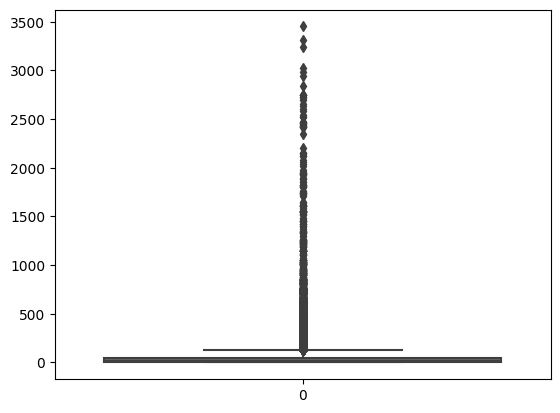

In [18]:
# Boxplot of target variable
sns.boxplot(df["target"])

In [19]:
# Columns of interest
interest = df.columns.drop(["ID", "DATOP", "STD", "STA"])

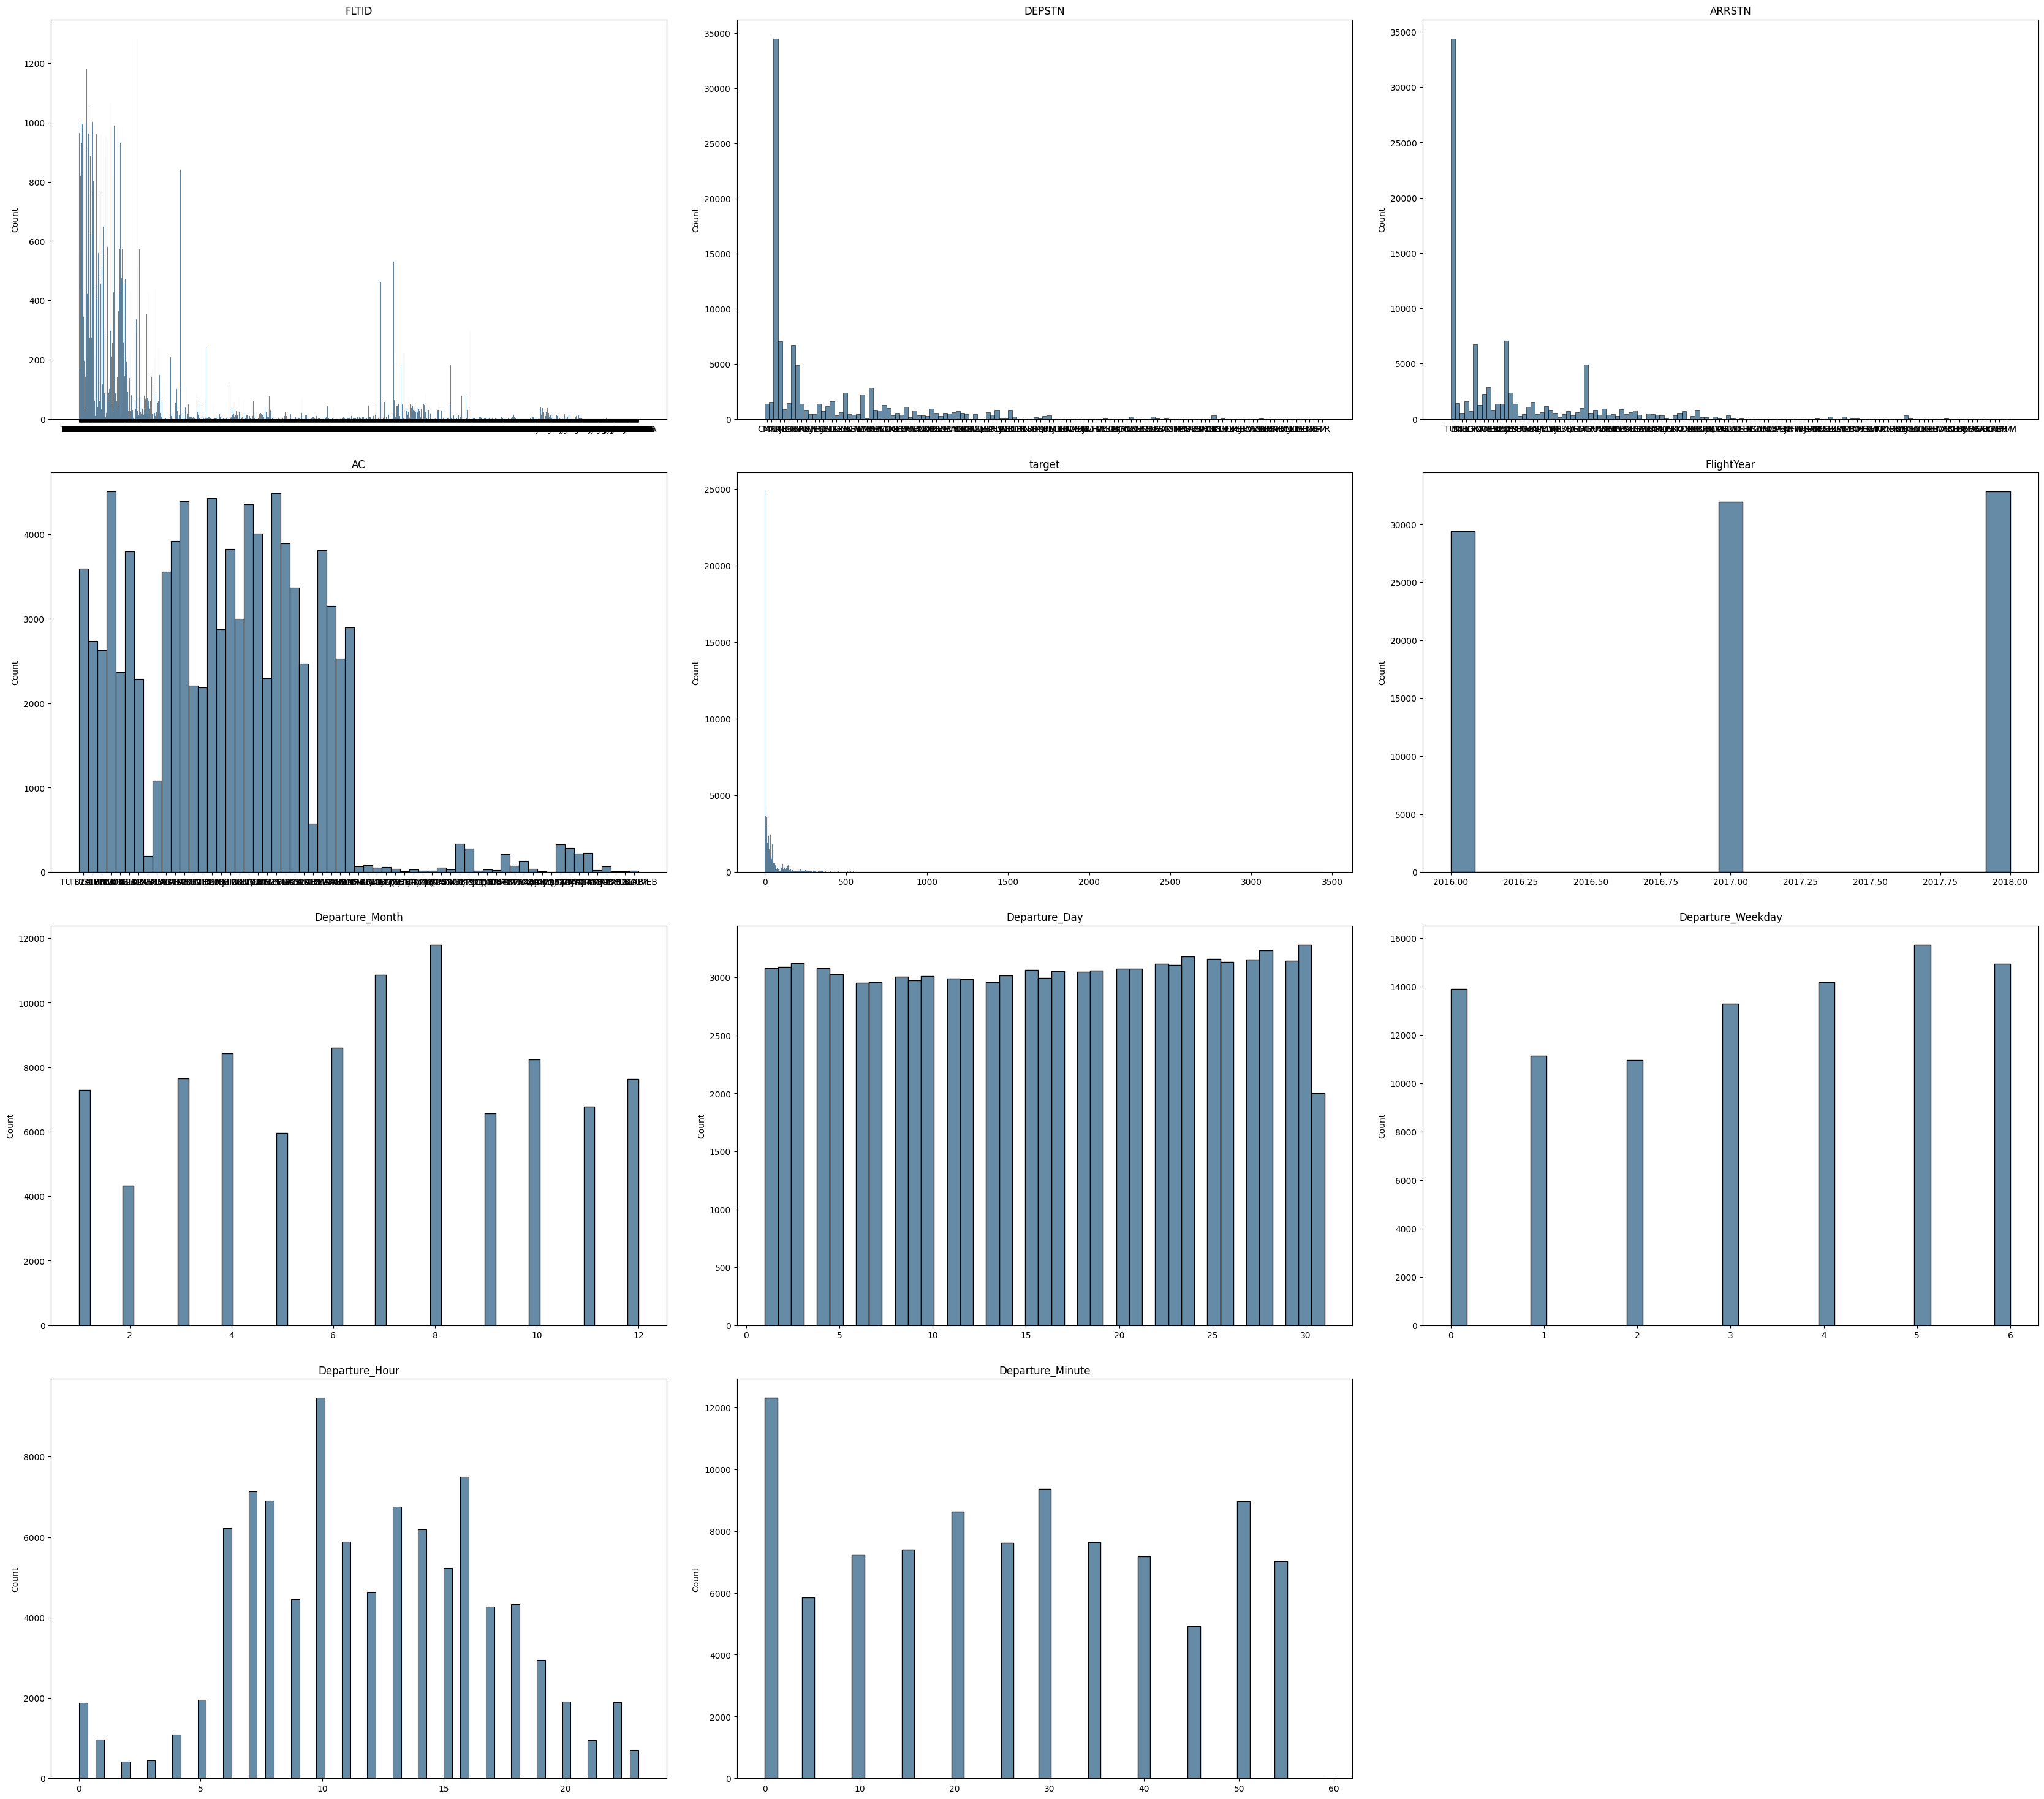

In [20]:
# Plot distribution of features 

fig,ax = plt.subplots(4,3,figsize=(34,30))
count = 0
for item in interest:
    sns.histplot(df[item], ax=ax[int(count/3)][count%3], color='#33658A').set(title=item, xlabel='')
    count += 1
ax.flat[-1].set_visible(False)
fig.tight_layout(pad=3)

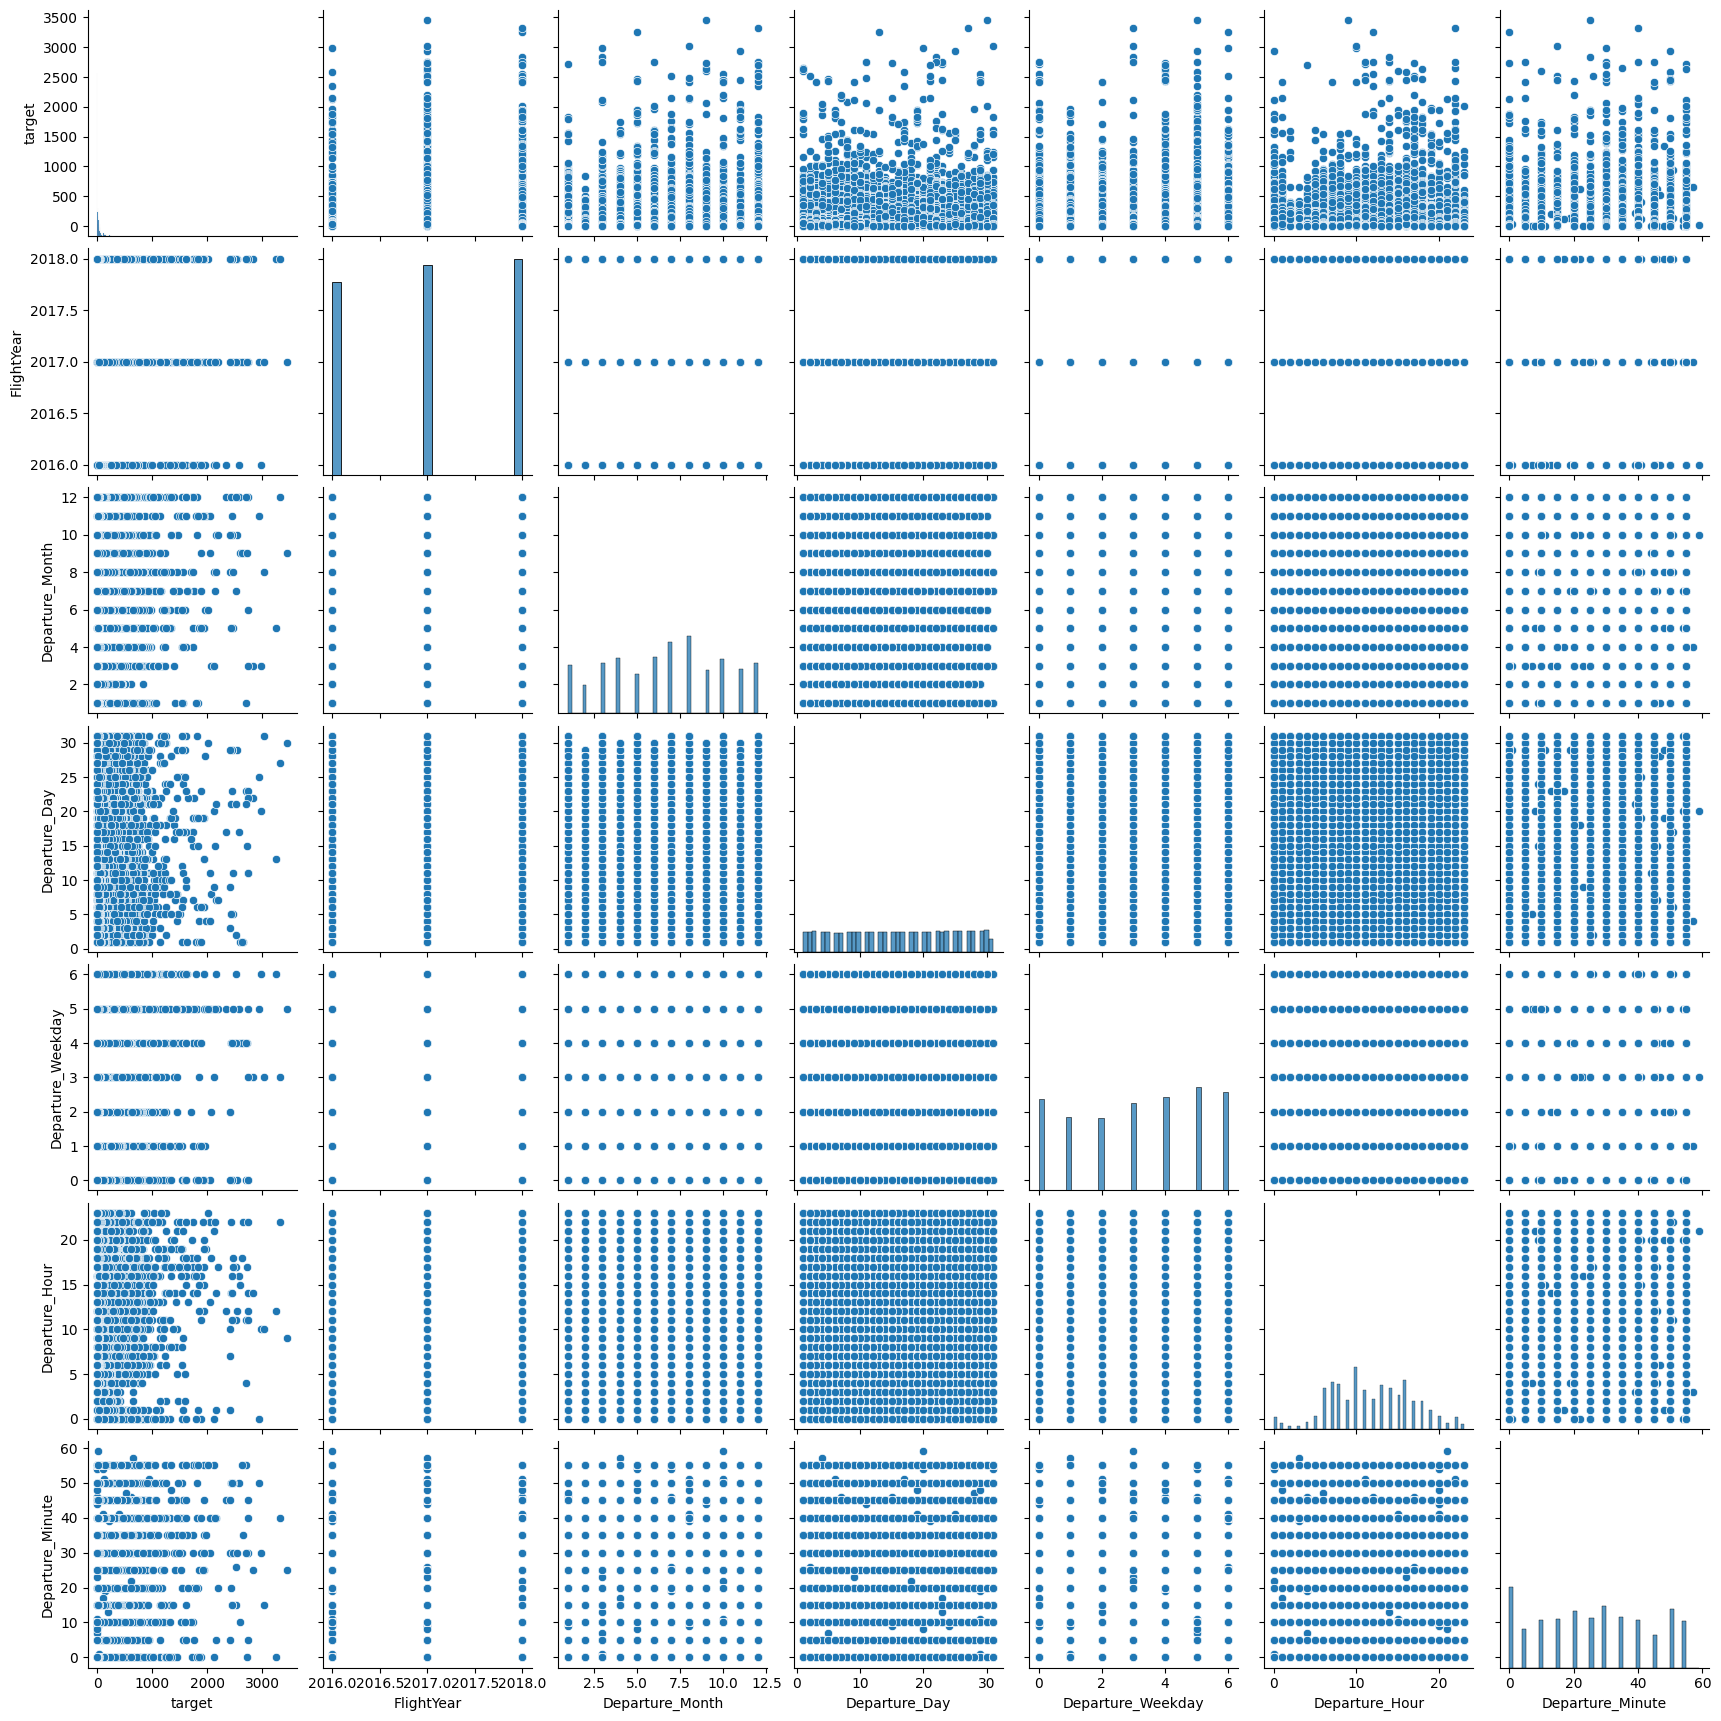

In [ ]:
# Pairplot for columns of interest
sns.pairplot(df[interest])
plt.show()

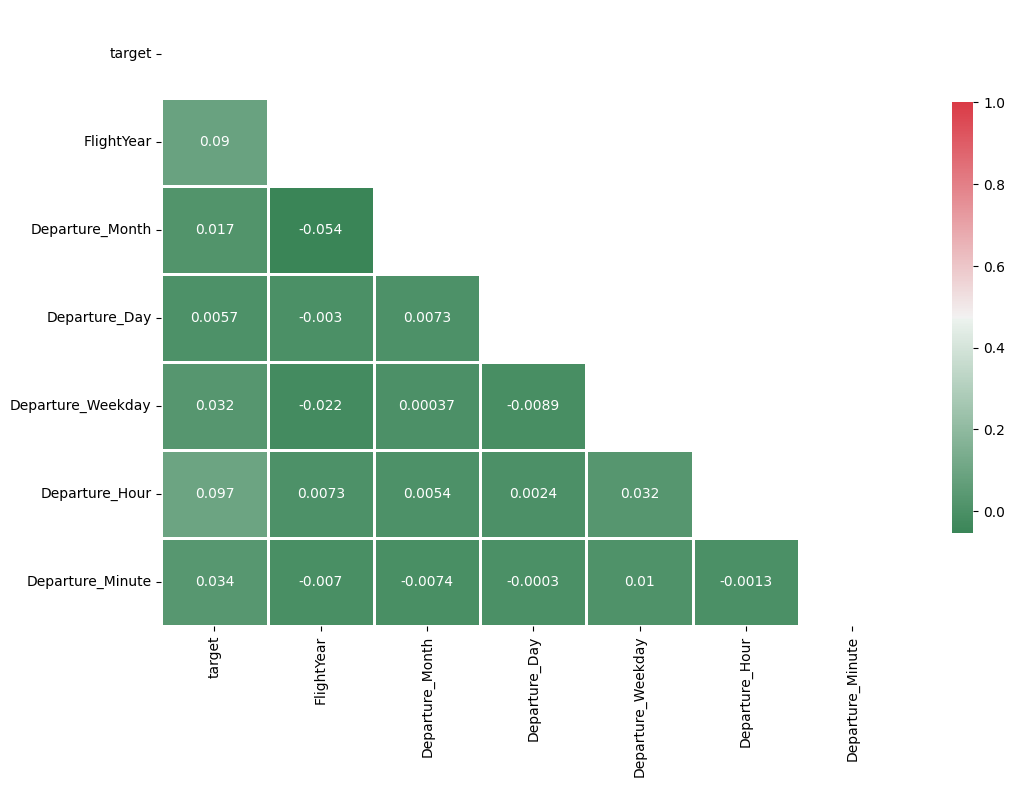

In [22]:
# Correlation heatmap

fig, ax = plt.subplots(figsize=(12,8))

# Create a new DataFrame that only includes the numerical variables
df_numeric = df[interest].select_dtypes(include=['float64', 'int32'])

# Compute correlations
correlations = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(140, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=1, annot=True,
            linewidths=1, cbar_kws={"shrink": .7}, ax=ax);

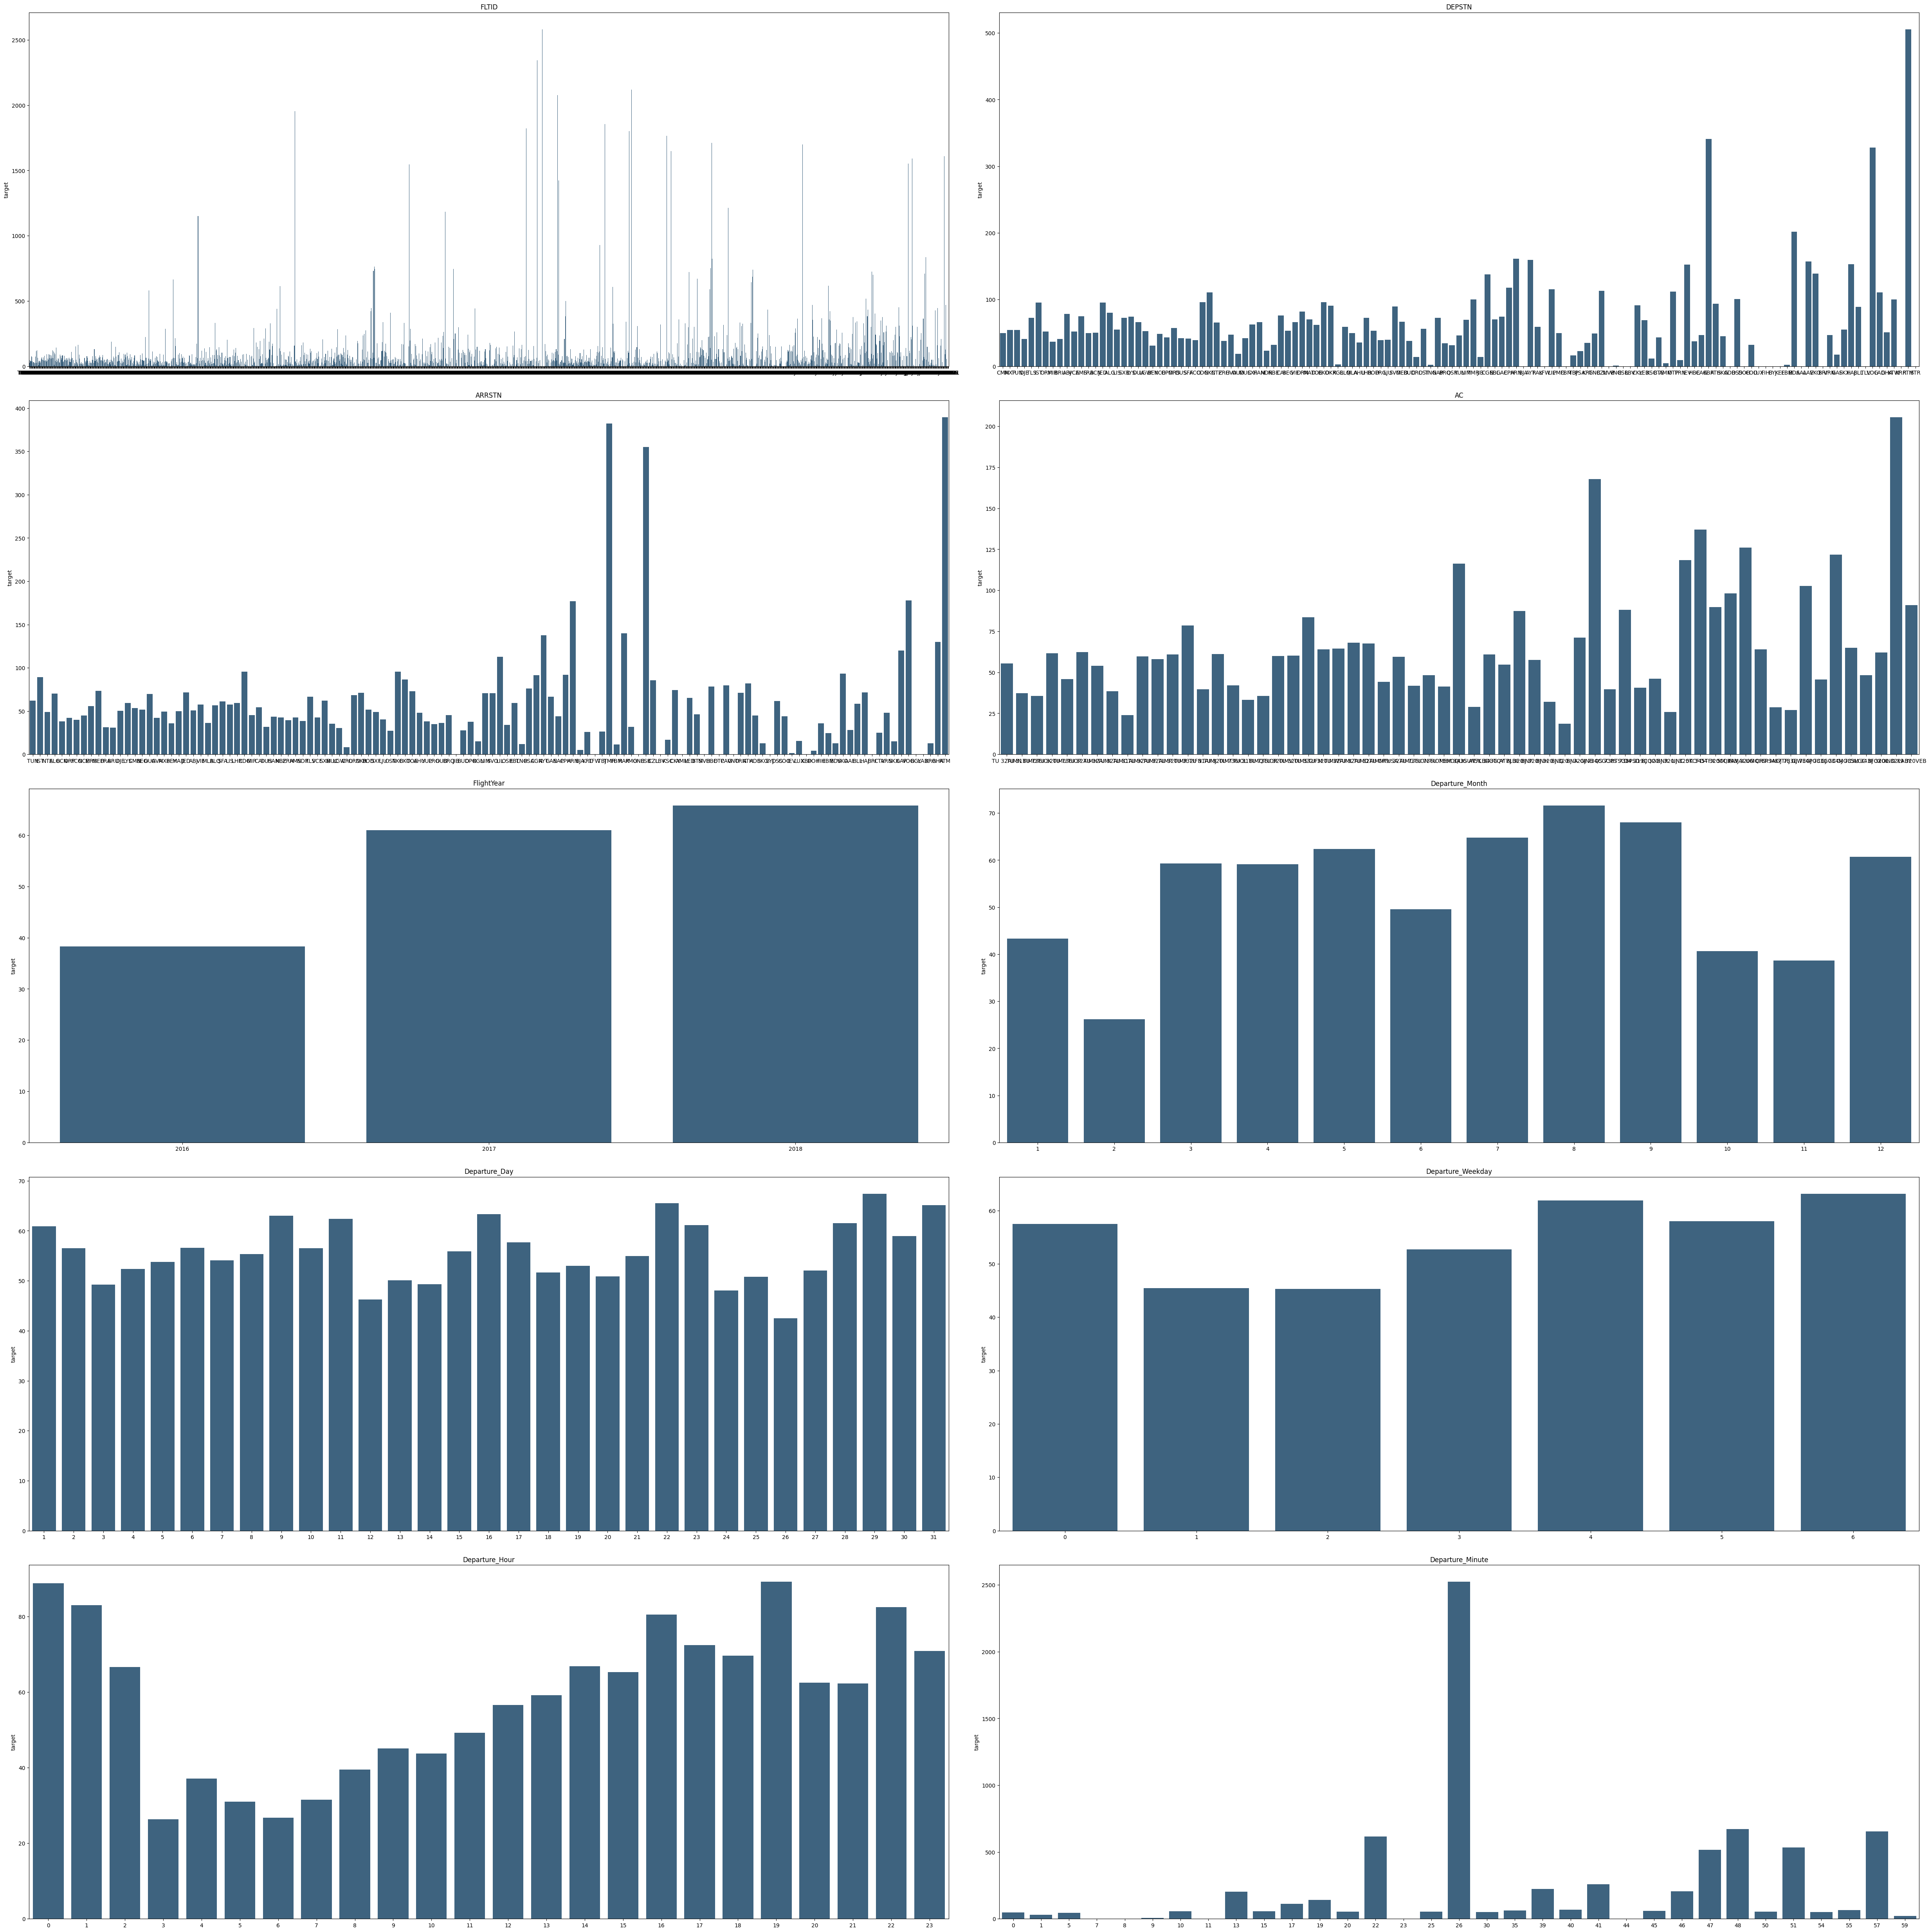

In [ ]:
# Barplots
interest_withoutTarget = interest.drop("target")

fig,ax = plt.subplots(5,2,figsize=(50,50))
count = 0
for item in interest_withoutTarget:
    sns.barplot(df, x=df[item], y= df["target"], errorbar=None, ax=ax[int(count/2)][count%2], color='#33658A').set(title=item, xlabel='')
    count += 1
fig.tight_layout(pad=3)

In [63]:
# Check wether flights with high delay only flew once --> yes
# Flights get mean and count of flights
flights = df[["DEPSTN", "ARRSTN", "target"]]
flights = flights.groupby(["DEPSTN", "ARRSTN"]).agg(["mean", "count"]).sort_values(by=("target", "mean"), ascending=False)
flights 

target      
                 mean count
DEPSTN ARRSTN              
LYS    CDG     2456.0     1
TUN    SVO     2123.0     1
ORY    MRS      770.0     1
CAI    DJE      703.0     1
ATH    SFA      653.0     1
...               ...   ...
NCE    TOE        0.0     1
TUN    AMM        0.0     2
DJE    LIL        0.0     1
       IEV        0.0     3
SFA    LYS        0.0     1

[682 rows x 2 columns]

# Train-test split

In [155]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df[["DEPSTN", "ARRSTN", "AC", "FlightYear", "Departure_Month", "Departure_Day", "Departure_Weekday", "Departure_Hour", "Departure_Minute"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Feature Engineering

In [ ]:
# Simon

# Define baseline model

In [175]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


# Defining baseline model
y_pred_baseline = train_data["target"].mean()

# Make predictions 
test_data["pred_baseline"] = y_pred_baseline


# Evaluate model
from sklearn.metrics import mean_squared_error #measures the variance of the residuals
from sklearn.metrics import r2_score #proportion of the variance in the dependent variable which is explained by the linear regression model

mse = mean_squared_error(test_data["target"], test_data["pred_baseline"])
r2 = r2_score(test_data["target"], test_data["pred_baseline"])
print("MSE:", mse)
print("R2:", r2)

MSE: 14645.676709335074
R2: -1.7187338641200256e-07


# Implement models

In [ ]:
# Linear regression model: Simon

In [156]:
# Random forest with CV (categorical variables need first to be encoded)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
RSEED = 99

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

random_grid = {'n_estimators': [int (x) for x in np.linspace(100, 2000, num=10)], # The number of trees in the forest
               'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], #function to measure the quality of a split
               'max_depth':  [int (x) for x in np.linspace(1, 200, num=10)], #The maximum depth of the tree
               'min_samples_split': [2, 4, 8, 10], # The minimum number of samples required to split an internal node
               'min_samples_leaf': [1, 2, 3, 4], #The minimum number of samples required to be at a leaf node
               'max_features': ['log2', 'sqrt', None], #The number of features to consider when looking for the best split
               }

model_RF = RandomizedSearchCV(RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, cv = cv, verbose=2, random_state=RSEED, n_jobs = -1)


# Fit on training data
model_RF.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=733; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=111, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1788; total time=   0.0s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=733; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=23, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=1366; total time=   0.0s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=733; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=23, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=1366; total time=   0.0s
[CV] END bootstrap=False, criterion=poisso

ValueError: 
All the 300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'MRS'

--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aylinhanne/Documents/neuefische/ML_project/AirorPrediction/.venv/lib/python3.11/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'DJE'


In [ ]:
# Print best parameters
print("Tuned hyperparameters :(best parameters) ",model_RF.best_params_)

In [ ]:
# Evaluate RandomForest model
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = model_RF.predict(X_train)
y_pred_test = model_RF.predict(X_test)

print("Train: mean_squared_error:", mean_squared_error(y_train, y_pred_train).round(3))
print("Train: R-squared:", r2_score(y_train, y_pred_train).round(3))

print("Test: mean_squared_error:", mean_squared_error(y_test, y_pred_test).round(3))
print("Test: R-squared:", r2_score(y_test, y_pred_test).round(3))

In [ ]:
# Boosting model

# Visualization of the results
Partial dependence plots? <br>
Permutation feature importance?